In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

In [3]:
data = pd.read_csv('/content/drive/MyDrive/songs ml/dataset.csv')
# data = pd.read_csv('dataset.csv')

In [ ]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

## Описание признаков
### 1. track_id - Уникальный идентификатор трека.
### 2. artists - исполнители трека.
### 3. album_name - Название альбома, в котором представлен трек.
### 4. track_name - название трека.
### 5. popularity - Популярность трека, выраженная числом от 0 до 100, где более высокие значения указывают на большую популярность среди слушателей.
### 6. duration_ms - Продолжительность трека в миллисекундах.
### 7. explicit - наличие ненормативной лексики True или False.
### 8. danceability - Танцевальность трека, оцениваемая от 0 до 1.
### 9. energy - Энергия трека, оцениваемая от 0 до 1. Высокие значения указывают на более энергичную и динамичную композицию.
### 10. key - Тональность трека, представленная числовым значением, соответствующим музыкальным нотам
### 11. loudness - Громкость трека в децибелах (dB). Отрицательные значения указывают на более тихий трек.
### 12. mode - Мода трека, где 1 обозначает мажорную тональность, а 0 — минорную.
### 13. acousticness - Оценка акустичности трека от 0 до 1. Высокие значения указывают на более акустическую и менее электронную композицию.
### 14. instrumentalness - Вероятность того, что трек не содержит вокала. Значения близкие к 1 указывают на полностью инструментальные треки.
### 15. liveness - Оценка, указывающая на вероятность, что трек был исполнен вживую.
### 16. valence - настроение трека от 0 до 1.
### 17. tempo - Темп трека в ударах в минуту (BPM).
### 18. time_signature - Размерность трека, указывающая количество ударов в такте.
### 19. track_genre - жанр трека.

In [ ]:
data['popularity'].value_counts()

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
98         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

50 - 94

In [ ]:
data['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

In [ ]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [4]:
data = data.dropna()

In [ ]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
data.shape

(113999, 21)

In [5]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [ ]:
categorical_features

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

In [6]:
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

Кодирование категориальных признаков

In [7]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

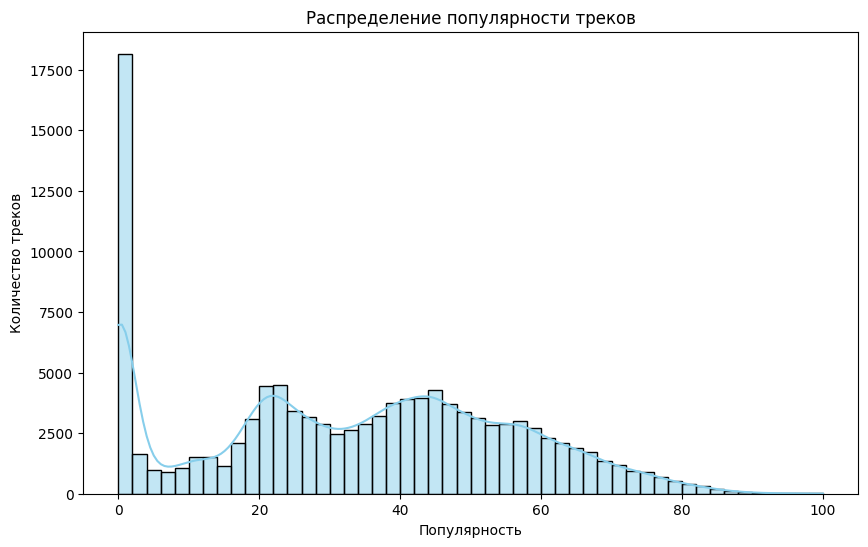

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(10,6))
sns.histplot(data['popularity'], bins=50, kde=True, color='skyblue')
plt.title('Распределение популярности треков')
plt.xlabel('Популярность')
plt.ylabel('Количество треков')
plt.show()

## График отображает распределение значений признака popularity. Мы можем увидеть что огромное количество треков неизветны или малоизвестны. Из этого можно сделать вывод, что с большой вероятностью выпущенный трек не будет известен.
## Влияние на модель:
1. Так как большая часть треков имеет низкую популярность, модель может быть склонна к предсказанию более низких значений популярности.

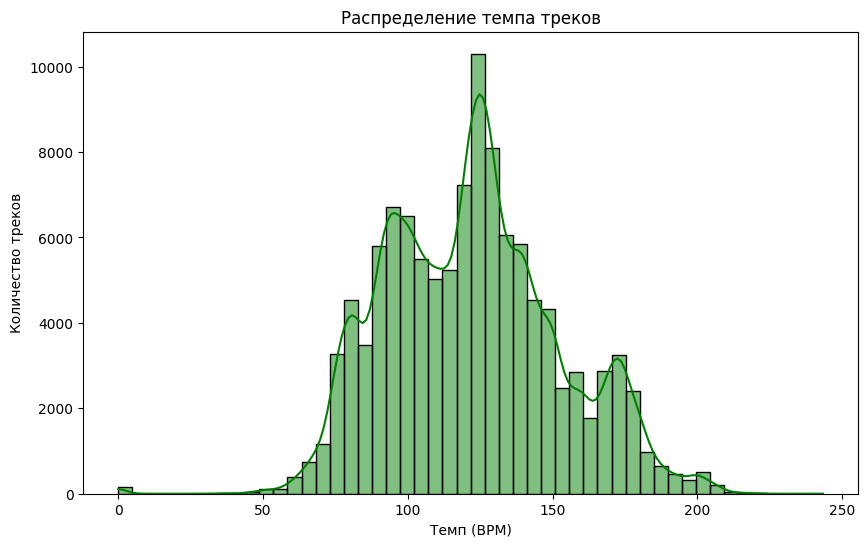

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['tempo'], bins=50, kde=True, color='green')
plt.title('Распределение темпа треков')
plt.xlabel('Темп (BPM)')
plt.ylabel('Количество треков')
plt.show()

## Данный график отображает распределение значений признака tempo (темп треков). Темп измеряется в BPM (удары в минуту). На графике можно увидеть, как часто встречаются определённые значения BPM. Большинство треков имеют темп в диапазоне от 80 до 140 BPM.
## Влияние на модель:
1. Темп может напрямую влиять на восприятие трека слушателями. Например быстрый темп ассоциируется с энергичностью и позитивом, что может способствовать популярности.
2. Темп может быть связан с другими признаками, например energy и danceability, что также влияет на популярность.

duration_ms
3-4 мин     42404
2-3 мин     26079
4-5 мин     22889
5-6 мин      8604
<2 мин       6252
6-7 мин      3914
7-8 мин      1914
8-9 мин       896
>10 мин       602
9-10 мин      444
Name: count, dtype: int64


C:\TEMP\ipykernel_16592\1585251353.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=duration_category, palette='Set3', order=labels)


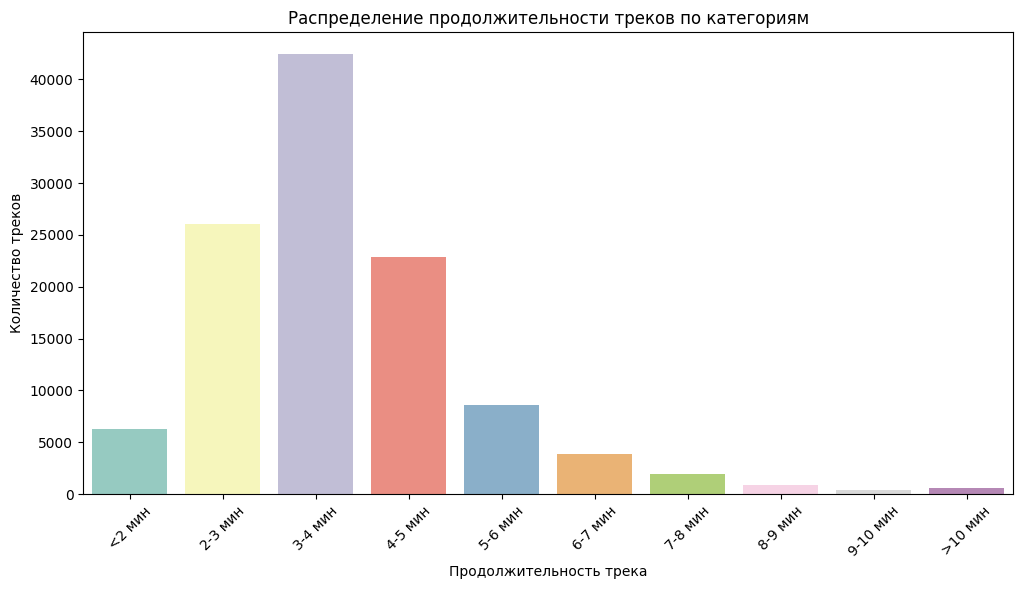

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Перевод длительности из миллисекунд в минуты
duration_min = data['duration_ms'] / 60000

# Определение категорий для длительности треков
bins = [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, duration_min.max()]
labels = ['<2 мин', '2-3 мин', '3-4 мин', '4-5 мин', '5-6 мин',
          '6-7 мин', '7-8 мин', '8-9 мин', '9-10 мин', '>10 мин']
duration_category = pd.cut(duration_min, bins=bins, labels=labels, right=False)

# Вывод количества треков в каждой категории
print(duration_category.value_counts())

# Построение вертикального графика (длительность по X, количество по Y)
plt.figure(figsize=(12,6))
sns.countplot(x=duration_category, palette='Set3', order=labels)
plt.title('Распределение продолжительности треков по категориям')
plt.xlabel('Продолжительность трека')
plt.ylabel('Количество треков')
plt.xticks(rotation=45)
plt.show()

## График представляет собой столбчатую диаграмму, отображающую кол-во треков в каждой категории продолжительности. Для лучшего понимания я изменил единицу измерения продолжительности с миллисекунд на минуты. Преобладающий диапазон длительности треков от 2 до 5 минут. Видно, что продолжительные треки встречаются очень редко. Коротких треков получилось ~6000, что может быть характерно для определённых жанров.
## Влияние на модель:
1. Продолжительность треков может существенно влиять на популярность. Так как треков продолжительностью от 2 минут до 5 сильно больше, чем других, можно подумать, что данная продолжительность является популярной среди слушателей.
2. Разбиение продолжительности на категории может упростить анализ и помочь в выявлении новых зависимостей.

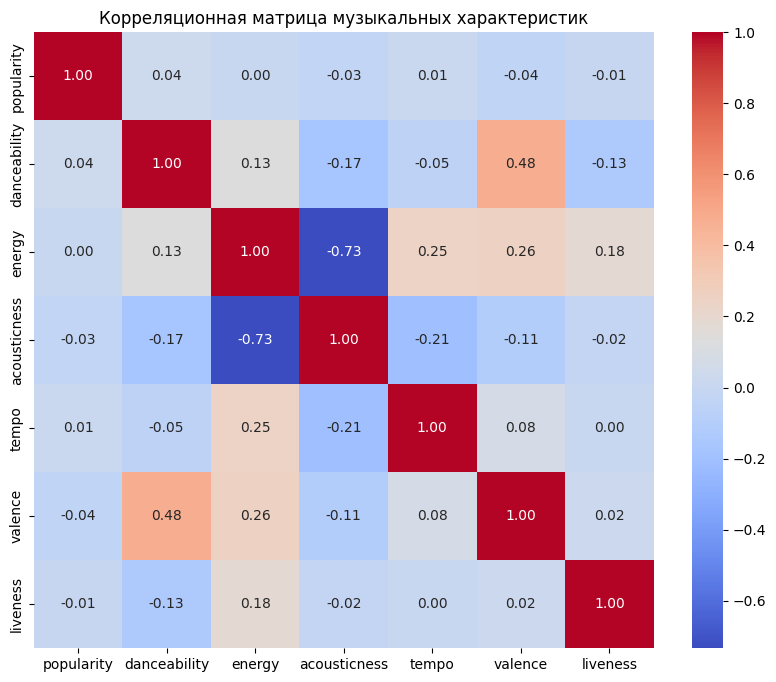

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем ключевые числовые признаки
features = ['popularity', 'danceability', 'energy', 'acousticness', 'tempo', 'valence', 'liveness']
corr = data[features].corr()

# Построение тепловой карты корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица музыкальных характеристик')
plt.show()

## График изображает корреляционную матрицу таких музыкальных характеристик как danceability, energy, acousticness, tempo, valence, liveness. На графике оттенки красного цвета указывают на положительную корреляцию, синие - на отрицательную. 1 означает полную положительную корреляцию, 0 - отсутствие, -1 - отрицательную. Очень слабая корреляция между музыкальными признаками и популярностью.
## Влияние на модель:
1. Исходя из того, что музыкальные характеристики имеют низкую корреляцию с целевой переменной, можно сказать, что данные признаки могут не оказывать значительного влияния на предсказание популярности трека.

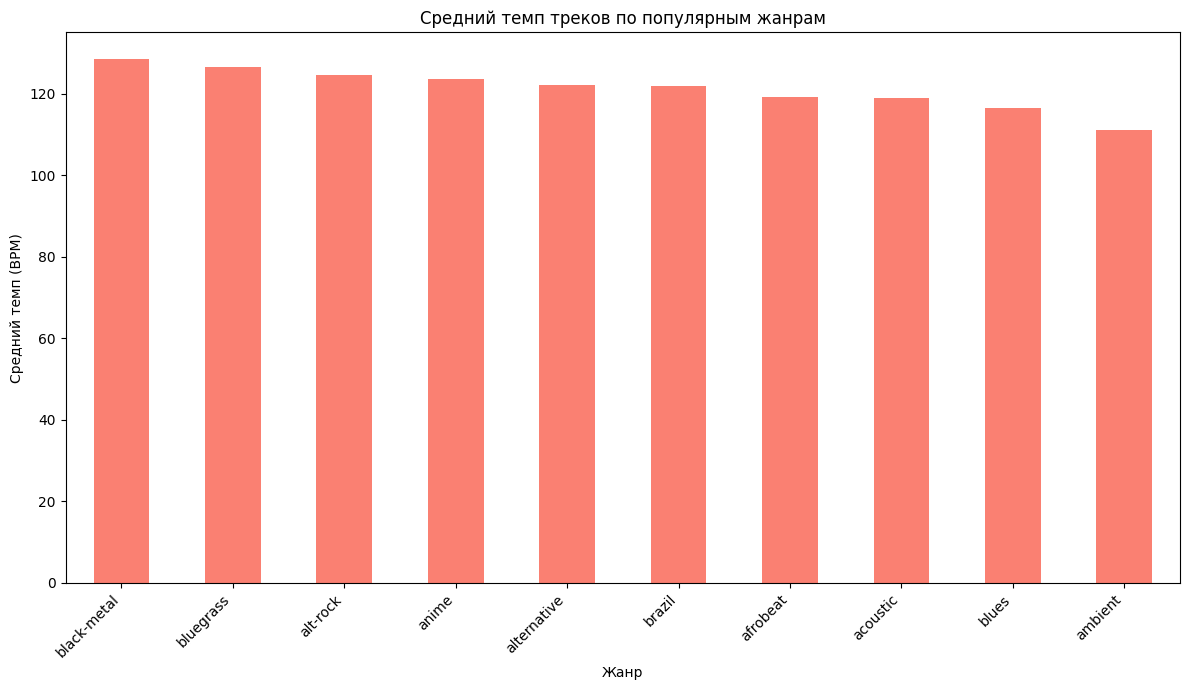

In [ ]:
# Выбираем 10 самых популярных жанров
top_genres_encoded = data['track_genre'].value_counts().index[:10]
top_genres_data = data[data['track_genre'].isin(top_genres_encoded)]

# Вычисляем средний темп для каждого из популярных жанров
mean_tempo = top_genres_data.groupby('track_genre')['tempo'].mean().sort_values(ascending=False)

# Преобразуем закодированные жанры обратно в текстовые названия
mean_tempo.index = label_encoders['track_genre'].inverse_transform(mean_tempo.index)

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 7))
mean_tempo.plot(kind='bar', color='salmon')
plt.title('Средний темп треков по популярным жанрам')
plt.xlabel('Жанр')
plt.ylabel('Средний темп (BPM)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Данный график показывает средний темп треков для 10 самых популярных жанров. Самый высокий средний темп у жанров power-pop, party, pagode.
## Влияние на модель:
1. Влияние темпа я рассмотрел во 2 графике, но можно добавить то, что средний темп треков из самых популярных жанров совпадает с наиболее популярным диапазоном всех треков.

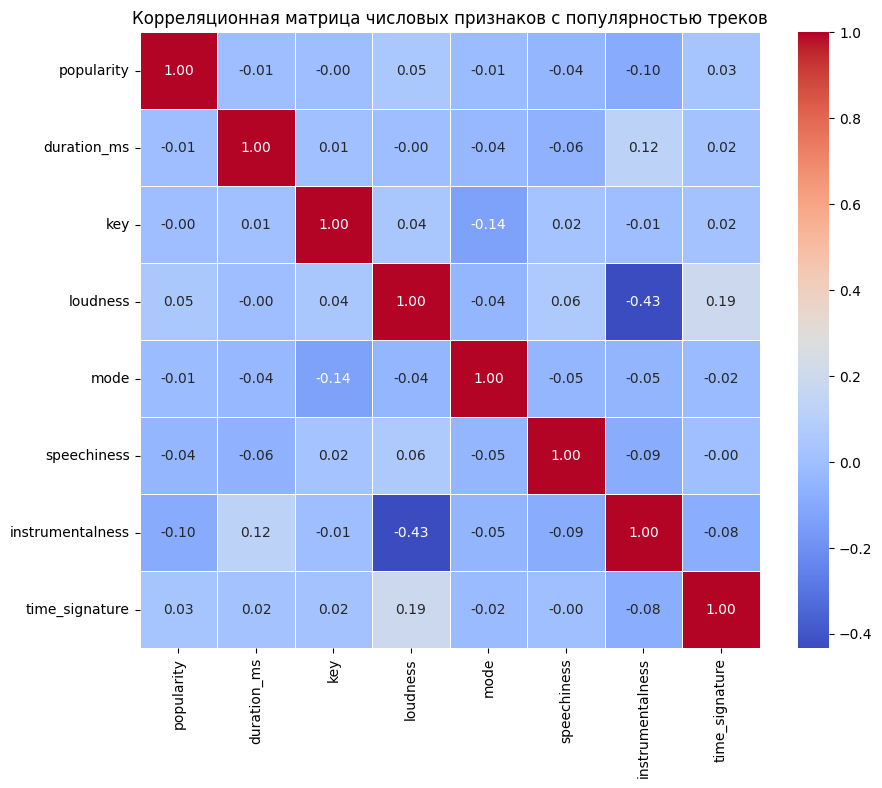

In [ ]:
selected_features = ['popularity', 'duration_ms', 'key', 'loudness',
                     'mode', 'speechiness', 'instrumentalness', 'time_signature']

corr_selected = data[selected_features].corr()

# Построение тепловой карты корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(corr_selected, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Корреляционная матрица числовых признаков с популярностью треков')
plt.show()

## График изображает корреляцию числовых признаков, которые не вошли в 4 график. Видно, что данные признаки также слабо коррелируют с популярностью.

## График распределиния танцевальности, энергичности, настроения и громкости.

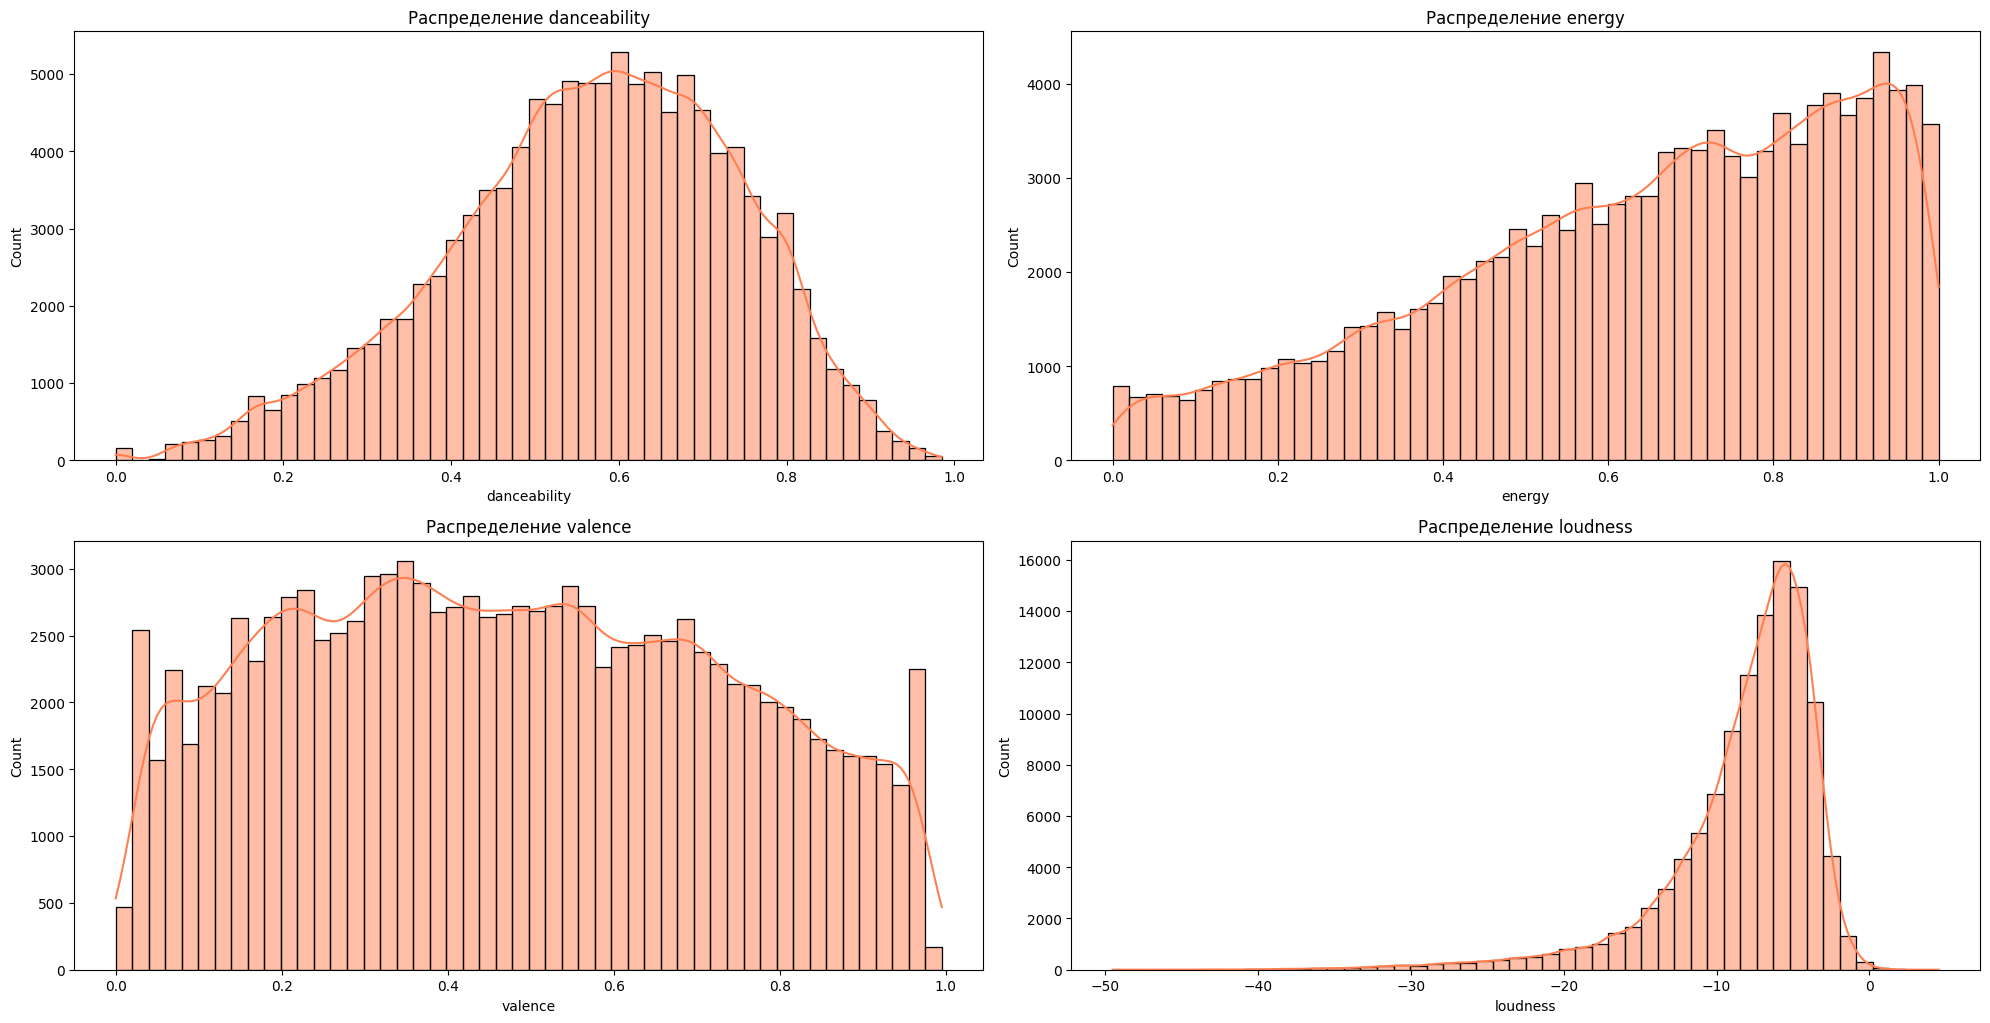

In [ ]:
key_features = ['danceability', 'energy', 'valence', 'loudness']

# Создание графиков распределения
plt.figure(figsize=(20,15))
for i, feature in enumerate(key_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[feature], bins=50, kde=True, color='coral')
    plt.title(f'Распределение {feature}')
plt.tight_layout()
plt.show()

* Danceability: Признак имеет нормальное распределение, центрированное ближе к значениям 0.6. Это говорит о том, что большая часть треков имеет среднюю или высокую "танцевальность".
* Energy: Наблюдается рост кол-ва треков с ростом энергичность. Большинство треков имеют энергию в диапазоне 0.7–1.0.
* Valence: Распределение приближено к равномерному, что показывает разнообразие в эмоциональной окраске треков.
* Loudness: Распределение близко к нормальному с пиком около -10 dB. Это стандартное значение для большинства музыкальных треков.



In [10]:
data.shape

(113999, 19)

Удаление признаков

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

data = data.drop(columns=['Unnamed: 0', 'track_id']) # Удаление ненужных признаков

In [13]:
data.shape

(113999, 135)

Применяю OHE для track_genre

In [11]:
low_cardinality_cols = ['track_genre']

data = pd.get_dummies(data, columns=low_cardinality_cols, prefix=low_cardinality_cols)

## Feature Engineering

In [12]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Настроение + танцевальность
data['valence_dancebility'] = data['valence'] * data['danceability']

# Взаимодействие между danceability и energy
data['dance_energy'] = data['danceability'] * data['energy']

# Добавление признака Ratio Acousticness to Speechiness
data['acoustic_speech_ratio'] = data['acousticness'] / (data['speechiness'] + 1e-5)

# Проверка новых признаков
print(data[['valence_dancebility','valence_dancebility', 'dance_energy', 'acoustic_speech_ratio']].head())

   valence_dancebility  valence_dancebility  dance_energy  \
0             0.483340             0.483340      0.311636   
1             0.112140             0.112140      0.069720   
2             0.052560             0.052560      0.157242   
3             0.038038             0.038038      0.015854   
4             0.103206             0.103206      0.273774   

   acoustic_speech_ratio  
0               0.225159  
1              12.108505  
2               3.769521  
3              24.924263  
4               8.914655  


## Корелляция новых признаков с popularity

popularity               1.000000
dance_energy             0.006054
acoustic_speech_ratio    0.004296
valence_dancebility     -0.035748
Name: popularity, dtype: float64


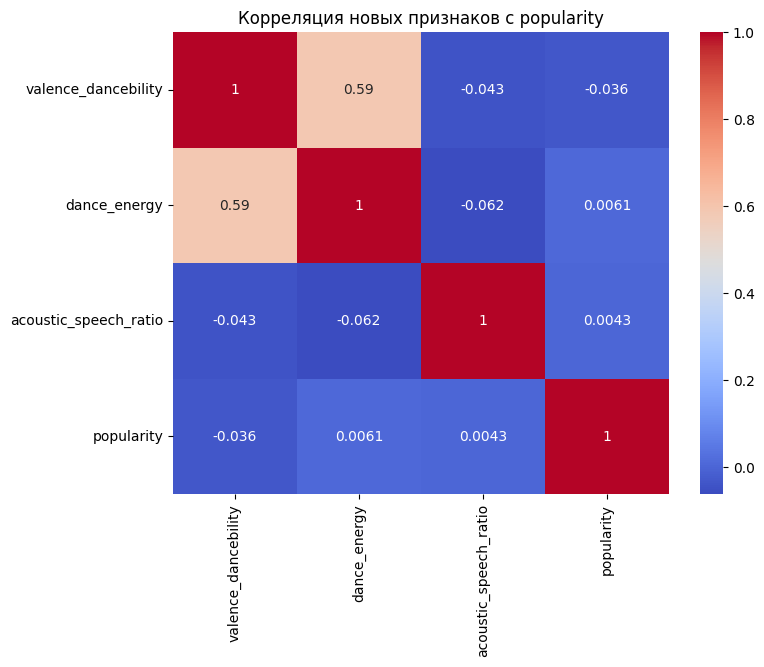

In [ ]:
new_features = ['valence_dancebility','dance_energy', 'acoustic_speech_ratio']
corr_new_features = data[new_features + ['popularity']].corr()
print(corr_new_features['popularity'].sort_values(ascending=False))

# Визуализация
plt.figure(figsize=(8,6))
sns.heatmap(corr_new_features, annot=True, cmap='coolwarm')
plt.title('Корреляция новых признаков с popularity')
plt.show()

In [ ]:
data.shape

(113999, 135)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Columns: 135 entries, artists to acoustic_speech_ratio
dtypes: bool(115), float64(12), int64(8)
memory usage: 30.8 MB


In [17]:
# Разделение данных на обучающую и тестовую выборки
X = data.drop(columns=['popularity'])  # измените на ваш целевой признак, если необходимо
y = data['popularity']  # измените на ваш целевой признак, если необходимо
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Columns: 135 entries, artists to acoustic_speech_ratio
dtypes: float64(12), int64(123)
memory usage: 118.3 MB


Кодирование булевых признаков

In [ ]:
boolean_features = data.select_dtypes(include=['bool']).columns.tolist()

In [ ]:
boolean_features

[]

In [ ]:
print(data['explicit'].unique())

[0 1]


In [14]:
boolean_cols = data.select_dtypes(include=['bool']).columns

In [15]:
for col in boolean_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
data['explicit'] = data['explicit'].fillna(False)

In [ ]:
data.isnull().sum()

artists                  0
album_name               0
track_name               0
popularity               0
duration_ms              0
                        ..
track_genre_112          0
track_genre_113          0
valence_dancebility      0
dance_energy             0
acoustic_speech_ratio    0
Length: 135, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Columns: 135 entries, artists to acoustic_speech_ratio
dtypes: float64(12), int64(123)
memory usage: 118.3 MB


In [ ]:
object_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Столбцы типа 'object':", object_cols)

print("Типы данных в X_train:")
print(X_train.dtypes)

print("\nТипы данных в X_test:")
print(X_test.dtypes)

Столбцы типа 'object': []
Типы данных в X_train:
artists                    int64
album_name                 int64
track_name                 int64
duration_ms                int64
explicit                   int64
                          ...   
track_genre_112            int64
track_genre_113            int64
valence_dancebility      float64
dance_energy             float64
acoustic_speech_ratio    float64
Length: 134, dtype: object

Типы данных в X_test:
artists                    int64
album_name                 int64
track_name                 int64
duration_ms                int64
explicit                   int64
                          ...   
track_genre_112            int64
track_genre_113            int64
valence_dancebility      float64
dance_energy             float64
acoustic_speech_ratio    float64
Length: 134, dtype: object


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Метрики которые я буду использовать:
* MAE (Mean Absolute Error) — Средняя Абсолютная Ошибка. MAE показывает, насколько в среднем предсказания модели отклоняются от реальных значений. Чем ниже значение MAE, тем точнее модель.
* MSE (Mean Squared Error) — Средняя Квадратичная Ошибка. MSE показывает среднюю величину квадратичной ошибки. Более высокие ошибки наказываются сильнее, чем в MAE, из-за квадратичного компонента.
* RMSE (Root Mean Squared Error) — Корень из Средней Квадратичной Ошибки. RMSE интерпретируется аналогично MSE, но в удобных единицах. Она также подчеркивает большие ошибки благодаря квадратичности.
* R² (Коэффициент детерминации) - R² измеряет долю дисперсии зависимой переменной, объясненную моделью. Она показывает, насколько хорошо предсказанные значения соответствуют реальным данным. Чем ближе к 1 тем лучше.
* MAPE (Mean Absolute Percentage Error) — Средняя Абсолютная Процентная Ошибка.

# Модель №1

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/25


c:\Data science\Data-science\нейронки\songs\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 776us/step - loss: 622.5976 - val_loss: 476.3760
Epoch 2/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 764us/step - loss: 473.7758 - val_loss: 467.1094
Epoch 3/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 746us/step - loss: 461.7075 - val_loss: 461.7238
Epoch 4/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 747us/step - loss: 456.8747 - val_loss: 455.7341
Epoch 5/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 756us/step - loss: 448.2177 - val_loss: 451.5243
Epoch 6/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 747us/step - loss: 444.6086 - val_loss: 448.6122
Epoch 7/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 742us/step - loss: 438.6011 - val_loss: 446.6090
Epoch 8/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 746us/step - loss: 433.0567 - val_loss: 443.1969
Epoch 9/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 746us/step - loss: 426.1463 - val_loss: 441.0383
Epoch 10/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 752us/step - loss: 426.5578 - val_loss: 435.7674
Epoch 11/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 750us/step - loss: 424.2

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")
print(f"MAPE: {mape:.2f}%")

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
MAE: 16.13
MSE: 401.77
RMSE: 20.04
R2 Score: 0.19
MAPE: 17576725235892224.00%


Данная модель обучалась до внедрения новых признаков и до OHE для жанра треков.
Модель демонстрирует относительно низкую точность предсказаний с R² всего 0.19, что указывает на слабую объясняющую способность модели. Высокие значения MAE и MSE свидетельствуют о значительных ошибках предсказания.

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
713/713 ━━━

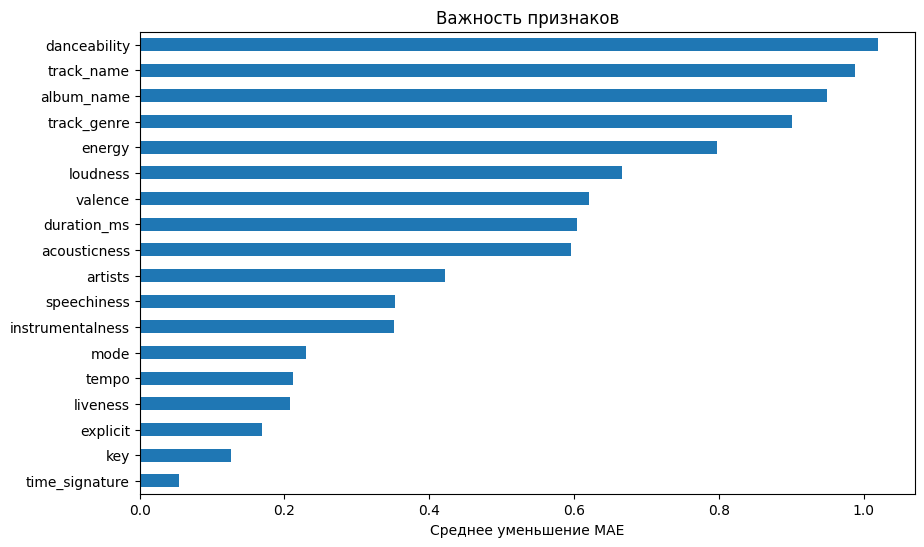

In [ ]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

## Модель №2

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def create_model():
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(1)  # выходной слой
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# model2 = KerasRegressor(model=create_model, epochs=50, batch_size=32, verbose=0)
model2 = create_model()

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss2 = model2.evaluate(X_test, y_test)
print(f'Test Loss: {loss2}')

Epoch 1/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 664.3658 - val_loss: 368.4180
Epoch 2/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 377.9609 - val_loss: 360.6513
Epoch 3/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 370.8546 - val_loss: 358.0331
Epoch 4/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 364.0232 - val_loss: 353.9758
Epoch 5/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 361.2319 - val_loss: 351.1894
Epoch 6/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 356.4118 - val_loss: 348.6001
Epoch 7/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 349.8225 - val_loss: 342.3826
Epoch 8/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 348.7349 - val_loss: 339.4126
Epoch 9/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 351.1968 - val_loss: 339.5897
Epoch 10/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 340.6488 - val_loss: 336.2973
Epoch 11/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 340.3688 - val_l

2 модель обучалась с кодировкой булевых признаков и с OHE для жанра треков, а также с новыми признаками

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

y_pred2 = model2.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred2)
mape = mean_absolute_percentage_error(y_test, y_pred2)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")
print(f"MAPE: {mape:.2f}%")

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
MAE: 12.16
MSE: 299.60
RMSE: 17.31
R2 Score: 0.40
MAPE: 12989443539468288.00%


Внедрение OHE значительно улучшило показатели модели. R² увеличился, а значения MAE и MSE снизились, что указывает на более точные предсказания.

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
713/713 ━━━

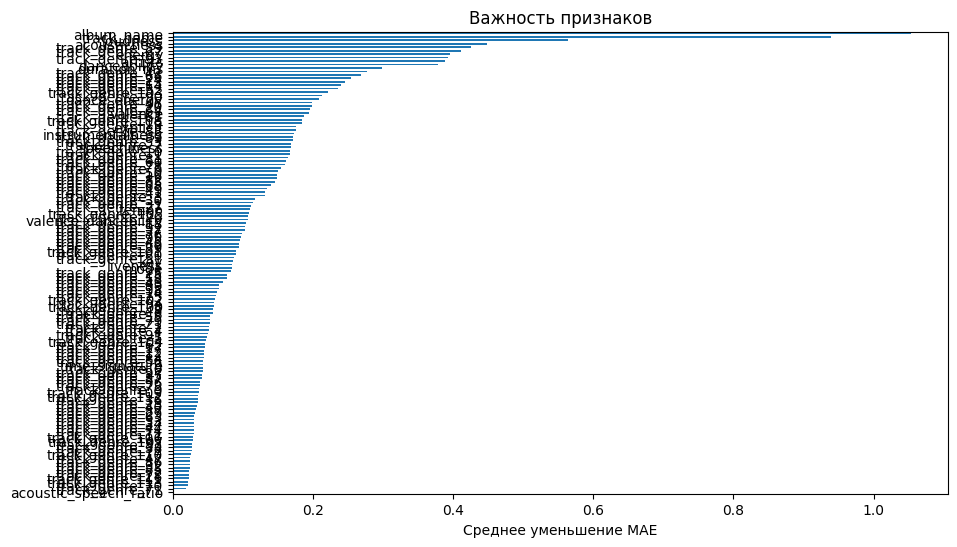

In [ ]:
result = permutation_importance(model2, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Оценка важности признаков выглядит не самой информативной, так как признаков слишком много из-за OHE, который я применил к признаку track_genre

## Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

In [ ]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / (y_test + 1e-5))) * 100

print("LinearRegression:")
print(f"MAE: {mae_lr}")
print(f"MSE: {mse_lr}")
print(f"RMSE: {rmse_lr}")
print(f"R2: {r2_lr}")
print(f"MAPE: {mape_lr}%")

LinearRegression:
MAE: 14.088706938027816
MSE: 365.29792937444427
RMSE: 19.11276875218356
R2: 0.26364507030716045
MAPE: 38393907.65436424%


Линейная регрессия показывает лучшие результаты по сравнению с 1 моделью, но её показатели уступают 2 модели нейронной сети, которая обучалась на таких же данных. Значит для этой задачи это не лучший выбор модели

## Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / (y_test + 1e-5))) * 100

print("RandomForestRegressor:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R2: {r2_rf}")
print(f"MAPE: {mape_rf}%")

RandomForestRegressor:
MAE: 9.64124567164439
MSE: 182.49173747820603
RMSE: 13.50895027299331
R2: 0.632139468322731
MAPE: 16445326.237019612%


Случайный лес демонстрирует значительное улучшение по всем метрикам, с R² = 0.63. Это свидетельствует о высокой точности и способности модели объяснять вариацию данных.

## Градиентный бустинг на основе XGBoost

In [ ]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.189,
    subsample=0.8,
    random_state=42
)
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

In [ ]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / (y_test + 1e-5))) * 100

print("XGBRegressor:")
print(f"MAE: {mae_xgb}")
print(f"MSE: {mse_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"R2: {r2_xgb}")
print(f"MAPE: {mape_xgb}%")

XGBRegressor:
MAE: 9.304381370544434
MSE: 177.37974548339844
RMSE: 13.318398758236608
R2: 0.6424440145492554
MAPE: 16045763.244696712%


Градиентный бустинг немного превосходит случайный лес по показателю R², достигая 0.64. Модель демонстрирует наилучшие результаты среди рассмотренных моделей, обеспечивая высокую точность предсказаний.

## Кросс-валидация для лучшей модели

Изначально мы ищем лучшую модель, а затем делаем для неё кросс-валидацию

In [21]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Предполагается, что X_train, y_train, X_test, y_test уже определены

models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBRegressor": XGBRegressor(
        n_estimators=500,
        max_depth=10,
        learning_rate=0.189,
        subsample=0.8,
        random_state=42
    )
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred)/(y_test + 1e-5)))*100

    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAPE': mape}

best_model_name = max(results, key=lambda x: results[x]['R2'])
print(f"\nЛучшая модель: {best_model_name} с R2={results[best_model_name]['R2']}")
best_model = models[best_model_name]

cv = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score, greater_is_better=True)

def cv_evaluate(model, X, y, cv):
    mae_scores = cross_val_score(model, X, y, cv=cv, scoring=mae_scorer)
    mse_scores = cross_val_score(model, X, y, cv=cv, scoring=mse_scorer)
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring=r2_scorer)

    mae_scores = -mae_scores
    mse_scores = -mse_scores
    rmse_scores = np.sqrt(mse_scores)

    return {
        'MAE_mean': np.mean(mae_scores), 'MAE_std': np.std(mae_scores),
        'MSE_mean': np.mean(mse_scores), 'MSE_std': np.std(mse_scores),
        'RMSE_mean': np.mean(rmse_scores), 'RMSE_std': np.std(rmse_scores),
        'R2_mean': np.mean(r2_scores), 'R2_std': np.std(r2_scores)
    }

cv_results = cv_evaluate(best_model, X_train, y_train, cv)

print("\nРезультаты кросс-валидации для лучшей модели:")
print(f"MAE: {cv_results['MAE_mean']} ± {cv_results['MAE_std']}")
print(f"MSE: {cv_results['MSE_mean']} ± {cv_results['MSE_std']}")
print(f"RMSE: {cv_results['RMSE_mean']} ± {cv_results['RMSE_std']}")
print(f"R²: {cv_results['R2_mean']} ± {cv_results['R2_std']}")


Лучшая модель: XGBRegressor с R2=0.6361407041549683

Результаты кросс-валидации для лучшей модели:
MAE: 9.735990423295828 ± 0.04044257290132856
MSE: 194.79587364767414 ± 1.7155938361980492
RMSE: 13.956794507801234 ± 0.061324666191504014
R²: 0.6087092399597168 ± 0.002431455073619076


## Итоговый вывод: В данной работе я решал задачу регрессии. Обучил модели: Нейронные сети, Линейная регрессия, Случайный лес и Градиентный бустинг. Сделал вывод о том, что использование One Hot Encoding очень сильно улучшает метрики, но при этом времени на обучение и оценку признаков требуется гораздо больше. Также я выявил лучшую модель, которая показала отличные метрики. Сделал для неё кросс-валидацию